<a href="https://colab.research.google.com/github/rifyalt/vial/blob/master/YouTube_Comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting Colab with Google Drive

In [12]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install PIP

In [13]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [16]:
!pip install webdriver_manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.4.3 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


### Update and Install Chrome Driver

In [17]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (104.0.5112.101-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [18]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 252 kB in 3s (95.8 kB/s)
Reading package li

### Install Libraries

In [168]:
import time
import csv
import bs4 as soup

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from bs4 import BeautifulSoup
from selenium import webdriver

In [169]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

use options instead of chrome_options



# Data Scraping

In [170]:
data=[]

with Chrome('chromedriver', chrome_options=chrome_options) as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://www.youtube.com/watch?v=GDyE1wFDWs0") #url youtube

    for item in range(300): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
        data.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

use options instead of chrome_options



## Import Text To Pandas

In [172]:
import pandas as pd   
df = pd.DataFrame(data, columns=['comment'])
df

,comment
0,"Untuk yg non-muslim, tolong di garis bawahi bahwa tidak semua muslim seperti Gus Samsudin."
1,"Semoga masyarakat Indonesia bisa semakin cerdas, semangat Pesulap Merah & Dr. Richard"
2,Tidak perlu pandai psikologi untuk paham di sini. Dokter Richad sudah mempermudah agar masyarakat Indonesia lebih paham dan mudah di mengerti maksud dari siaran ini. Terimakasih dokter
3,"Meski banyak yang tidak setuju denganmu. Sayapribadi sangat mendukungmu dan selalu mendoakanmu ... Semangat trus bang marcel, selalu bongkar orang yg melakukan penipuan atas kedok agama"
4,Pak dr. Richard Lee seharusnya sadar diri karena bukan kapasitas beliau untuk menangani masalah dan kondisi kejiwaan yang sedang diderita pasien ini. Salut atas kesabaran pak dokter!
...,...
4669,"HATERS SEMAKIN GALAU, PASUKAN COSPLAY, MUKANYA MEMERAH, GSJ JOSSSS"
4670,Gus Samsudin itu membuktikan di belakang cameraaa Gak mau depan cameraa
4671,"good job gus samsudin,emas tetap emas mantap,"
4672,Saya mendukung Gus samsudin


In [173]:
df.head()

,comment
0,"Untuk yg non-muslim, tolong di garis bawahi bahwa tidak semua muslim seperti Gus Samsudin."
1,"Semoga masyarakat Indonesia bisa semakin cerdas, semangat Pesulap Merah & Dr. Richard"
2,Tidak perlu pandai psikologi untuk paham di sini. Dokter Richad sudah mempermudah agar masyarakat Indonesia lebih paham dan mudah di mengerti maksud dari siaran ini. Terimakasih dokter
3,"Meski banyak yang tidak setuju denganmu. Sayapribadi sangat mendukungmu dan selalu mendoakanmu ... Semangat trus bang marcel, selalu bongkar orang yg melakukan penipuan atas kedok agama"
4,Pak dr. Richard Lee seharusnya sadar diri karena bukan kapasitas beliau untuk menangani masalah dan kondisi kejiwaan yang sedang diderita pasien ini. Salut atas kesabaran pak dokter!


# Word Cloud Preprocessing Text



### Install PIP

In [174]:
!pip install -q wordcloud

In [175]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Install Libararies

In [176]:
from os import path
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

import wordcloud
import nltk
nltk.download('all') 

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [177]:
df['comment'] = df['comment'].str.lower()

In [178]:
df

,comment
0,"untuk yg non-muslim, tolong di garis bawahi bahwa tidak semua muslim seperti gus samsudin."
1,"semoga masyarakat indonesia bisa semakin cerdas, semangat pesulap merah & dr. richard"
2,tidak perlu pandai psikologi untuk paham di sini. dokter richad sudah mempermudah agar masyarakat indonesia lebih paham dan mudah di mengerti maksud dari siaran ini. terimakasih dokter
3,"meski banyak yang tidak setuju denganmu. sayapribadi sangat mendukungmu dan selalu mendoakanmu ... semangat trus bang marcel, selalu bongkar orang yg melakukan penipuan atas kedok agama"
4,pak dr. richard lee seharusnya sadar diri karena bukan kapasitas beliau untuk menangani masalah dan kondisi kejiwaan yang sedang diderita pasien ini. salut atas kesabaran pak dokter!
...,...
4669,"haters semakin galau, pasukan cosplay, mukanya memerah, gsj jossss"
4670,gus samsudin itu membuktikan di belakang cameraaa gak mau depan cameraa
4671,"good job gus samsudin,emas tetap emas mantap,"
4672,saya mendukung gus samsudin


In [180]:
# tokenized sentences

def identify_tokens(row):
    review = row['comment']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['words'] = df.apply(identify_tokens, axis=1)

In [181]:
# lemmatize tokenized words

from nltk.stem import WordNetLemmatizer
stemming = WordNetLemmatizer()

def stem_list(row):
    my_list = row['words']
    stemmed_list = [stemming.lemmatize(word) for word in my_list]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stem_list, axis=1)

## Create Stopwords

In [182]:
from nltk.corpus import stopwords

In [198]:
# Create stopword list:
stopwords1 = stopwords.words('english')
stopwords1.extend(stopwords.words('indonesian'))

# Remove custom words according to context
stopwords1.extend([' ','...','-','&','allah','Allah','lu','syap','org','orng','app','ni','ny','eh','jg','tpi','yg',"dgn","trus",
                   'dr','lg','tv','nih','ksh','ah','gw','smua','bata','utk','uda',"knpa",'gus','gu','bgt','mu','tau','ssna',
                   'dlu','emang','ad','ku','klo','nih','log','hr','dg','sm',"bsa",'donk','tuh','di','kalo',
                   'sdh','deh','tgl','org','dri','ngga','klau','tdk','prose','udh','ttp',"si",'gue',
                   'pa','loh','blm','bnyk','lbh','gak','nya','ga','sj','ja','sy','dah','dpt',"hp",
                   'sya','tp','aja','gk','udah','dh','jd','sih','ini','ya','jgn'])

def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stopwords1]
    return (meaningful_words)

df['stem_meaningful'] = df.apply(remove_stops, axis=1)

In [199]:
#rejoin words

def rejoin_words(row):
    my_list = row['stem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

df['processed'] = df.apply(rejoin_words, axis=1)

In [200]:
df

,comment,words,stemmed_words,stem_meaningful,processed
0,"untuk yg non-muslim, tolong di garis bawahi bahwa tidak semua muslim seperti gus samsudin.","[untuk, yg, tolong, di, garis, bawahi, bahwa, tidak, semua, muslim, seperti, gus, samsudin]","[untuk, yg, tolong, di, gari, bawahi, bahwa, tidak, semua, muslim, seperti, gu, samsudin]","[tolong, gari, bawahi, muslim, samsudin]",tolong gari bawahi muslim samsudin
1,"semoga masyarakat indonesia bisa semakin cerdas, semangat pesulap merah & dr. richard","[semoga, masyarakat, indonesia, bisa, semakin, cerdas, semangat, pesulap, merah, richard]","[semoga, masyarakat, indonesia, bisa, semakin, cerdas, semangat, pesulap, merah, richard]","[semoga, masyarakat, indonesia, cerdas, semangat, pesulap, merah, richard]",semoga masyarakat indonesia cerdas semangat pesulap merah richard
2,tidak perlu pandai psikologi untuk paham di sini. dokter richad sudah mempermudah agar masyarakat indonesia lebih paham dan mudah di mengerti maksud dari siaran ini. terimakasih dokter,"[tidak, perlu, pandai, psikologi, untuk, paham, di, sini, dokter, richad, sudah, mempermudah, agar, masyarakat, indonesia, lebih, paham, dan, mudah, di, mengerti, maksud, dari, siaran, ini, terimakasih, dokter]","[tidak, perlu, pandai, psikologi, untuk, paham, di, sini, dokter, richad, sudah, mempermudah, agar, masyarakat, indonesia, lebih, paham, dan, mudah, di, mengerti, maksud, dari, siaran, ini, terimakasih, dokter]","[pandai, psikologi, paham, dokter, richad, mempermudah, masyarakat, indonesia, paham, mudah, mengerti, maksud, siaran, terimakasih, dokter]",pandai psikologi paham dokter richad mempermudah masyarakat indonesia paham mudah mengerti maksud siaran terimakasih dokter
3,"meski banyak yang tidak setuju denganmu. sayapribadi sangat mendukungmu dan selalu mendoakanmu ... semangat trus bang marcel, selalu bongkar orang yg melakukan penipuan atas kedok agama","[meski, banyak, yang, tidak, setuju, denganmu, sayapribadi, sangat, mendukungmu, dan, selalu, mendoakanmu, semangat, trus, bang, marcel, selalu, bongkar, orang, yg, melakukan, penipuan, atas, kedok, agama]","[meski, banyak, yang, tidak, setuju, denganmu, sayapribadi, sangat, mendukungmu, dan, selalu, mendoakanmu, semangat, trus, bang, marcel, selalu, bongkar, orang, yg, melakukan, penipuan, atas, kedok, agama]","[setuju, denganmu, sayapribadi, mendukungmu, mendoakanmu, semangat, bang, marcel, bongkar, orang, penipuan, kedok, agama]",setuju denganmu sayapribadi mendukungmu mendoakanmu semangat bang marcel bongkar orang penipuan kedok agama
4,pak dr. richard lee seharusnya sadar diri karena bukan kapasitas beliau untuk menangani masalah dan kondisi kejiwaan yang sedang diderita pasien ini. salut atas kesabaran pak dokter!,"[pak, richard, lee, seharusnya, sadar, diri, karena, bukan, kapasitas, beliau, untuk, menangani, masalah, dan, kondisi, kejiwaan, yang, sedang, diderita, pasien, ini, salut, atas, kesabaran, pak, dokter]","[pak, richard, lee, seharusnya, sadar, diri, karena, bukan, kapasitas, beliau, untuk, menangani, masalah, dan, kondisi, kejiwaan, yang, sedang, diderita, pasien, ini, salut, atas, kesabaran, pak, dokter]","[richard, lee, sadar, kapasitas, beliau, menangani, kondisi, kejiwaan, diderita, pasien, salut, kesabaran, dokter]",richard lee sadar kapasitas beliau menangani kondisi kejiwaan diderita pasien salut kesabaran dokter
...,...,...,...,...,...
4669,"haters semakin galau, pasukan cosplay, mukanya memerah, gsj jossss","[haters, semakin, galau, pasukan, cosplay, mukanya, memerah, gsj, jossss]","[hater, semakin, galau, pasukan, cosplay, mukanya, memerah, gsj, joss]","[hater, galau, pasukan, cosplay, mukanya, memerah, gsj, joss]",hater galau pasukan cosplay mukanya memerah gsj joss
4670,gus samsudin itu membuktikan di belakang cameraaa gak mau depan cameraa,"[gus, samsudin, itu, membuktikan, di, belakang, cameraaa, gak, mau, depan, cameraa]","[gu, samsudin, itu, membuktikan, di, belakang, cameraaa, gak, mau, depan, cameraa]","[samsudin, membuktikan, 

# Generate a word cloud image

In [201]:
text = " ".join(review for review in df.processed)
print ("There are {} words in the combination of all comment.".format(len(text)))

There are 285964 words in the combination of all comment.


In [202]:
pd.set_option('max_colwidth', 600)

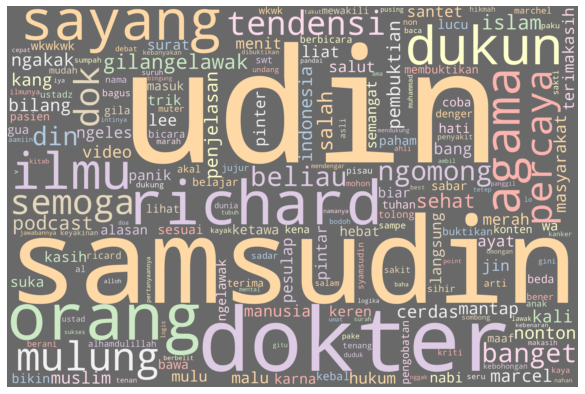

In [242]:
# Generate a word cloud image
wordcloud = WordCloud(
    background_color="dimgrey",
    colormap='Pastel1', 
    width = 3000,
    height = 2000, 
    collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(20,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Visualization

In [243]:
import seaborn as sns
import urllib
import re

%matplotlib inline

## Prepare data

In [244]:
stop_words = set(stopwords.words("english"))

#create function to get a DataFrame
def get_df(input_text):
    list_words = input_text.split(' ')
    set_words_full = list(set(list_words))
    
    #remove stop words
    set_words = [i for i in set_words_full if i not in stop_words]
    
    #count each word
    count_words = [list_words.count(i) for i in set_words]
    
    #create DataFrame
    df = pd.DataFrame(zip(set_words, count_words), columns=['words','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

#create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

In [245]:
# Clean text
text_c = re.sub('[^A-Za-z0-9°]+', ' ', text)
text_c = text_c.replace('\n', '').lower()
text_c

'tolong gari bawahi muslim samsudin semoga masyarakat indonesia cerdas semangat pesulap merah richard pandai psikologi paham dokter richad mempermudah masyarakat indonesia paham mudah mengerti maksud siaran terimakasih dokter setuju denganmu sayapribadi mendukungmu mendoakanmu semangat bang marcel bongkar orang penipuan kedok agama richard lee sadar kapasitas beliau menangani kondisi kejiwaan diderita pasien salut kesabaran dokter percaya penjelasan marchel mendengar penjelasan udin percaya marchel kriti n ilmiah sajian tontonan bermutu biarkan pemirsa cerdas menilai sndri substansinya lanjutkan dok keren semoga tindakan berwajib ulama udin dokter terimakasih salud terimakasih samsudin tayangan pelajaran berharga ngomong orang halu hiburan murah meriah gila keren banget dokter kgk berbelit langsung point ngefans gua asli semangatt richard lee statement rapih sesuai fakta ilmiah mui turun tangan memiliki legalitas keilmuan ttg islam biar agama islam ternoda bertanggungjawab salut dokter

In [246]:
df_words = get_df(text_c)
df_words.head(10)

,words,count
0,udin,1041
1,samsudin,927
2,dokter,660
3,orang,551
4,richard,477
5,sayang,408
6,dukun,359
7,ilmu,329
8,agama,313
9,mulung,299


1. Turning multiple bar charts into a Grid of bar charts.

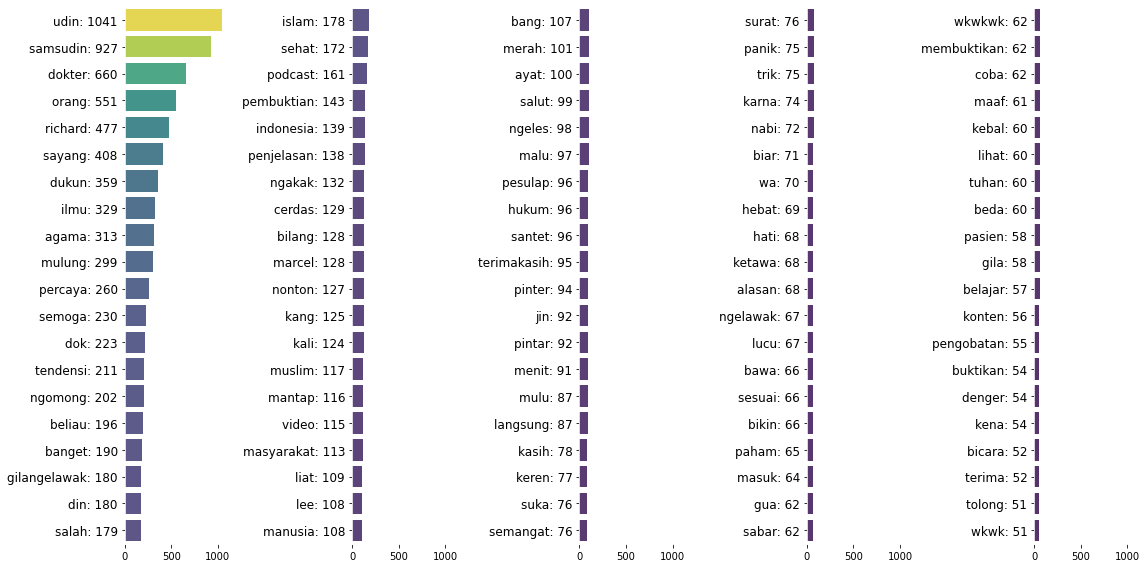

In [247]:
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

n = df_words['count'].max()
color_dict = get_colordict('viridis', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16,8), facecolor='white', squeeze=False)
for col, idx in zip(range(0,5), index_list):
    df = df_words[idx[0]:idx[-1]]
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+1)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=12)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()    
plt.show()

2. Increasing hierarchy from donut chart to Sunburst graph

In [248]:
n = 5
pal = list(sns.color_palette(palette="deep", n_colors=n).as_hex())
#pal = sns.color_palette("deep", as_cmap=True)

import plotly.express as px
fig = px.pie(df_words[0:20], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.5, hoverinfo="label+percent+name")

fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

3. Grouping bubbles with a Circle packing

In [249]:
! pip install circlify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [250]:
import circlify
# compute circle positions:
circles = circlify.circlify(df_words['count'][0:30].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
n = df_words['count'][0:30].max()
color_dict = get_colordict('RdYlBu_r',n ,1)

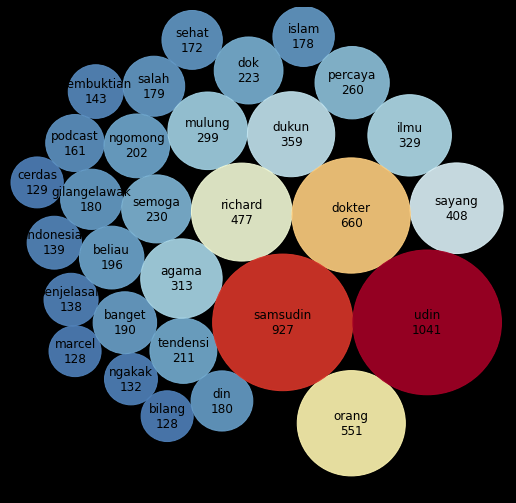

In [251]:
fig, ax = plt.subplots(figsize=(9,9), facecolor='black')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(df_words['words'][0:30])
counts = list(df_words['count'][0:30])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color_dict.get(count)))
    plt.annotate(label +'\n'+ str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

Refrences: 

- https://towardsdatascience.com/how-to-scrape-youtube-comments-with-python-61ff197115d4
- https://towardsdatascience.com/beyond-the-cloud-4-visualizations-to-use-instead-of-word-cloud-960dd516f215
- https://medium.com/dair-ai/building-your-first-wordcloud-with-google-colaboratory-and-python-b3c8c1be5883
- https://colab.research.google.com/github/pinkychow1010/digital-chinese-history-blog/blob/master/_notebooks/2020-02-02-Circlify.ipynb#scrollTo=N6iHWGN8bzrP
- https://github.com/amueller/word_cloud